In [1]:
#Importing packages
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import the price data
prices = pd.read_csv("prices.csv")

In [3]:
prices.head()

,Auditor ID,Date,Price,Store ID,UPC
0,234,10/18/17,24.95,66999,268588472
1,234,10/27/17,49.71,66999,475245085
2,234,10/20/17,25.75,66999,126967843
3,234,10/23/17,18.81,66999,708930835
4,234,10/23/17,33.32,66999,325885139


In [4]:
prices.shape

(12315, 5)

In [5]:
#Import the stores data
store = pd.read_json("stores.json")

In [6]:
store.head()

,Banner,Region,Store ID
0,Walmart,Northern California,66999
1,Trader Joes,Northern California,4698
2,Safeway,Northern California,39482
3,Whole Foods,Northern California,34957
4,Walmart,New York,12837


In [7]:
store.shape

(28, 3)

In [8]:
#import the auditor data
auditors = pd.read_csv("auditors.csv")

In [9]:
auditors.head()

,Auditor ID,First,Last,Region
0,234,Sue,Smith,Northern California
1,536,Bob,Smith,Northern California
2,98,Jack,Smith,New York
3,203,Jill,Smith,New York
4,304,Jerry,Johnson,Texas


In [10]:
auditors.shape

(8, 4)

In [11]:
#Merge all the three dataset
df = pd.merge(pd.merge(prices,store,on='Store ID').drop('Region', axis=1),auditors,on='Auditor ID')

In [12]:
df.head()

,Auditor ID,Date,Price,Store ID,UPC,Banner,First,Last,Region
0,234,10/18/17,24.95,66999,268588472,Walmart,Sue,Smith,Northern California
1,234,10/27/17,49.71,66999,475245085,Walmart,Sue,Smith,Northern California
2,234,10/20/17,25.75,66999,126967843,Walmart,Sue,Smith,Northern California
3,234,10/23/17,18.81,66999,708930835,Walmart,Sue,Smith,Northern California
4,234,10/23/17,33.32,66999,325885139,Walmart,Sue,Smith,Northern California


# Creating the Cross table 

In [13]:
#Creating Cross-table for the Region
cross_table= pd.crosstab(index=[df['Banner'] , df['UPC']], columns=df['Region'],
            values = df['Price'], aggfunc='mean', colnames=['Id'])

In [14]:
table = cross_table.reset_index()

In [15]:
table = table.sort_values(by=['Banner'])
table.head()

Id,Banner,UPC,Kansas,New York,Northern California,Texas
0,Safeway,11873171,NaN,6.09,NaN,5.19
644,Safeway,676274385,NaN,48.79,NaN,41.99
645,Safeway,676939567,38.39,NaN,NaN,NaN
646,Safeway,677674656,19.59,22.99,NaN,19.79
647,Safeway,678530217,NaN,NaN,NaN,39.69


# Exporting the data

In [16]:
# save to the csv file
table.to_csv("output.csv", index=False)

In [17]:
table.describe()

Id,UPC,Kansas,New York,Northern California,Texas
count,4.931000e+03,3087.000000,3331.000000,1328.000000,3765.000000
mean,5.088255e+08,21.390198,31.368157,35.471310,30.084550
std,2.878944e+08,18.610435,17.436303,19.717375,16.709557
min,1.187317e+07,0.690000,0.590000,0.690000,0.590000
25%,2.661121e+08,1.990000,17.020000,19.090000,16.290000
50%,5.090565e+08,17.690000,31.090000,34.990000,29.840000
75%,7.644589e+08,37.490000,45.590000,51.597500,44.060000
max,9.991851e+08,59.990000,70.090000,74.490000,63.890000


**From the above table, we can see that the mean of the prices is maximum for Northern California, followed by New York, Texas and Kansas, which aligns with the real-world expectations. But something to note is that the first quartile value is very low for Kansas compared to other states. This might need more inspection.**

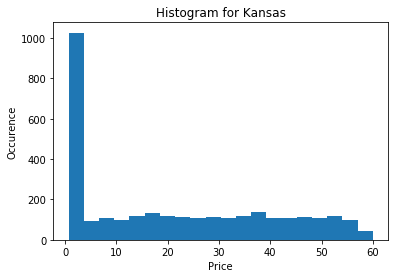

In [18]:
plt.hist(table['Kansas'], bins=20)
plt.ylabel('Occurence')
plt.xlabel('Price')
plt.title("Histogram for Kansas")
plt.show()

**From the above graph, we can see that either Kansas has a lot of missing values or the prices of commodities are generally low as compared to other states.**

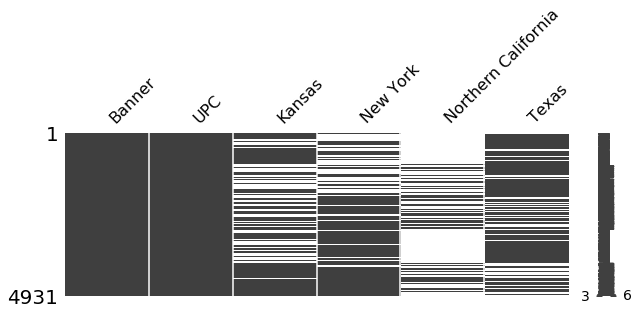

In [19]:
import missingno as msno
msno.matrix(table,figsize=(10,3))

In [20]:
table.isnull().sum()

Id
Banner                    0
UPC                       0
Kansas                 1844
New York               1600
Northern California    3603
Texas                  1166
dtype: int64

**The above table and graph show that Northern California has the maximum number of missing values and Texas has the least.**

**Let's check the data for outliers:**

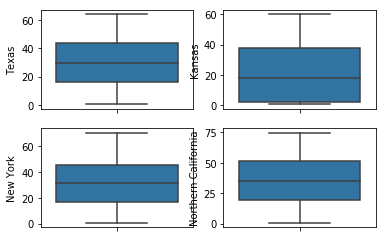

In [21]:
fig, axes = plt.subplots(nrows=2,ncols=2)
sn.boxplot(data=table,x=table["Texas"],orient="v", ax=axes[0,0])
sn.boxplot(data=table,x=table["Kansas"],orient="v", ax=axes[0,1] )
sn.boxplot(data=table,x=table["New York"],orient="v", ax=axes[1,0])
sn.boxplot(data=table,x=table["Northern California"],orient="v", ax=axes[1,1])

**We can see from the Box Plot that there are no outliers. Also, we can see that the spread of the data for Kansas is over lower price values as compared to other states.**

Text(0.5, 1.0, 'Banner Comparision of average price in all the States')

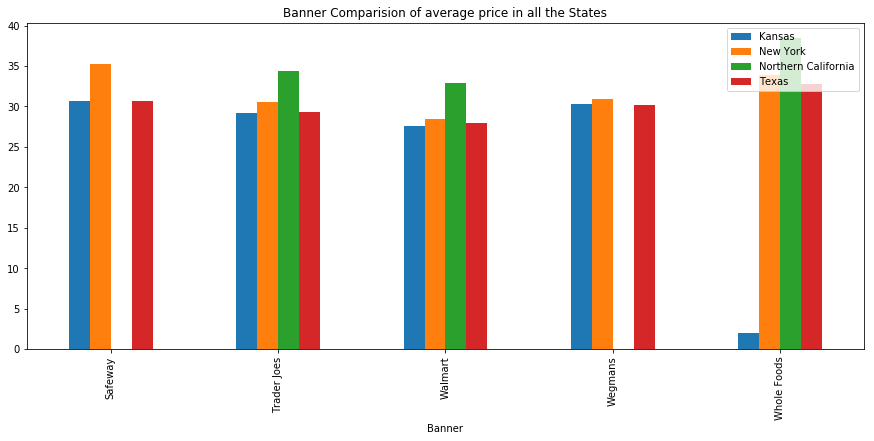

In [22]:
comparision = table.groupby('Banner').mean().drop("UPC", axis =1)
comparision.plot(kind = 'bar', figsize=(15,6))
plt.legend(loc='upper right')
plt.title('Banner Comparision of average price in all the States')

**From the above graph we can conclude many things:**

**1. The auditors did not collect data from Safeway and Wegmans for the state of Northern California.**

**2. The avg price of Whole Food in Kansas is extremely low compared to the average price of other brands in the same city is an anomaly. That is why the histogram displayed a lot of values between 0 to 10. This could be because there might be a lot of missing values only for Whole Foods in Kansas or the prices are market incorrectly. Hence, the auditors of Kansas city should be asked to take a look at it.**

**3. For the brands where the data is available, Northern California seems to be the costliest states as compared to other states, followed by New York. This causes no anomaly.**

In [23]:
auditors[auditors["Region"]=="Kansas"]

,Auditor ID,First,Last,Region
6,1326,Mike,Johnson,Kansas
7,713,Dave,Johnson,Kansas


So, both these auditors should be asked to cross check the prices for Whole Foods.